In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd

In [2]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
prices = pd.read_csv('/kaggle/input/new-york-housing-market/NY-House-Dataset.csv')
print(f'Dataset contains {prices.shape[0]} rows and {prices.shape[1]} columns')

Dataset contains 4801 rows and 17 columns


In [4]:
prices.duplicated().sum()
prices = prices.drop_duplicates()

In [5]:
prices.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [6]:
prices['BROKERTITLE'] = prices['BROKERTITLE'].str.replace('Brokered by', '')
prices['PROPERTYSQFT'] = prices['PROPERTYSQFT'].apply(np.int64)
prices['BATH'] = prices['BATH'].apply(np.int64)

In [7]:
prices.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Serhant,Condo for sale,195000000,7,10,17545,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Sowae Corp,House for sale,260000,4,2,2015,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,COMPASS,Condo for sale,69000,3,1,445,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Sotheby's International Realty - East Side Ma...,Townhouse for sale,55000000,7,2,14175,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [8]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   object 
 1   TYPE                         4587 non-null   object 
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   int64  
 4   BATH                         4587 non-null   int64  
 5   PROPERTYSQFT                 4587 non-null   int64  
 6   ADDRESS                      4587 non-null   object 
 7   STATE                        4587 non-null   object 
 8   MAIN_ADDRESS                 4587 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 10  LOCALITY                     4587 non-null   object 
 11  SUBLOCALITY                  4587 non-null   object 
 12  STREET_NAME                  4587 non-null   object 
 13  LONG_NAME              

In [9]:
prices.describe().T.style \
      .background_gradient('Blues')

,count,mean,std,min,25%,50%,75%,max
PRICE,4587.000000,2381171.682363,32068307.750561,2494.000000,499000.000000,825000.000000,1498500.000000,2147483647.000000
BEDS,4587.000000,3.365816,2.628808,1.000000,2.000000,3.000000,4.000000,50.000000
BATH,4587.000000,2.354262,1.970637,0.000000,1.000000,2.000000,3.000000,50.000000
PROPERTYSQFT,4587.000000,2177.642686,2283.095363,230.000000,1200.000000,2184.000000,2184.000000,65535.000000
LATITUDE,4587.000000,40.713932,0.087738,40.499546,40.638588,40.726667,40.771913,40.912729
LONGITUDE,4587.000000,-73.941584,0.101276,-74.253033,-73.987420,-73.949116,-73.869455,-73.702450


In [10]:
coords = prices.drop_duplicates(subset=['LATITUDE', 'LONGITUDE'])
geometry = gpd.points_from_xy(coords.LONGITUDE, coords.LATITUDE)
geo_df = gpd.GeoDataFrame(coords[['LATITUDE', 'LONGITUDE']], 
                          geometry=geometry)

data_map = folium.Map(prefer_canvas=True)
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

for coordinates in geo_df_list:
    data_map.add_child(folium.CircleMarker(location=coordinates, radius=0.05,
                                           weight=2, zoom=5, color="orange"))
data_map.fit_bounds(data_map.get_bounds())
data_map

In [11]:
prices.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Serhant,Condo for sale,195000000,7,10,17545,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Sowae Corp,House for sale,260000,4,2,2015,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,COMPASS,Condo for sale,69000,3,1,445,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Sotheby's International Realty - East Side Ma...,Townhouse for sale,55000000,7,2,14175,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


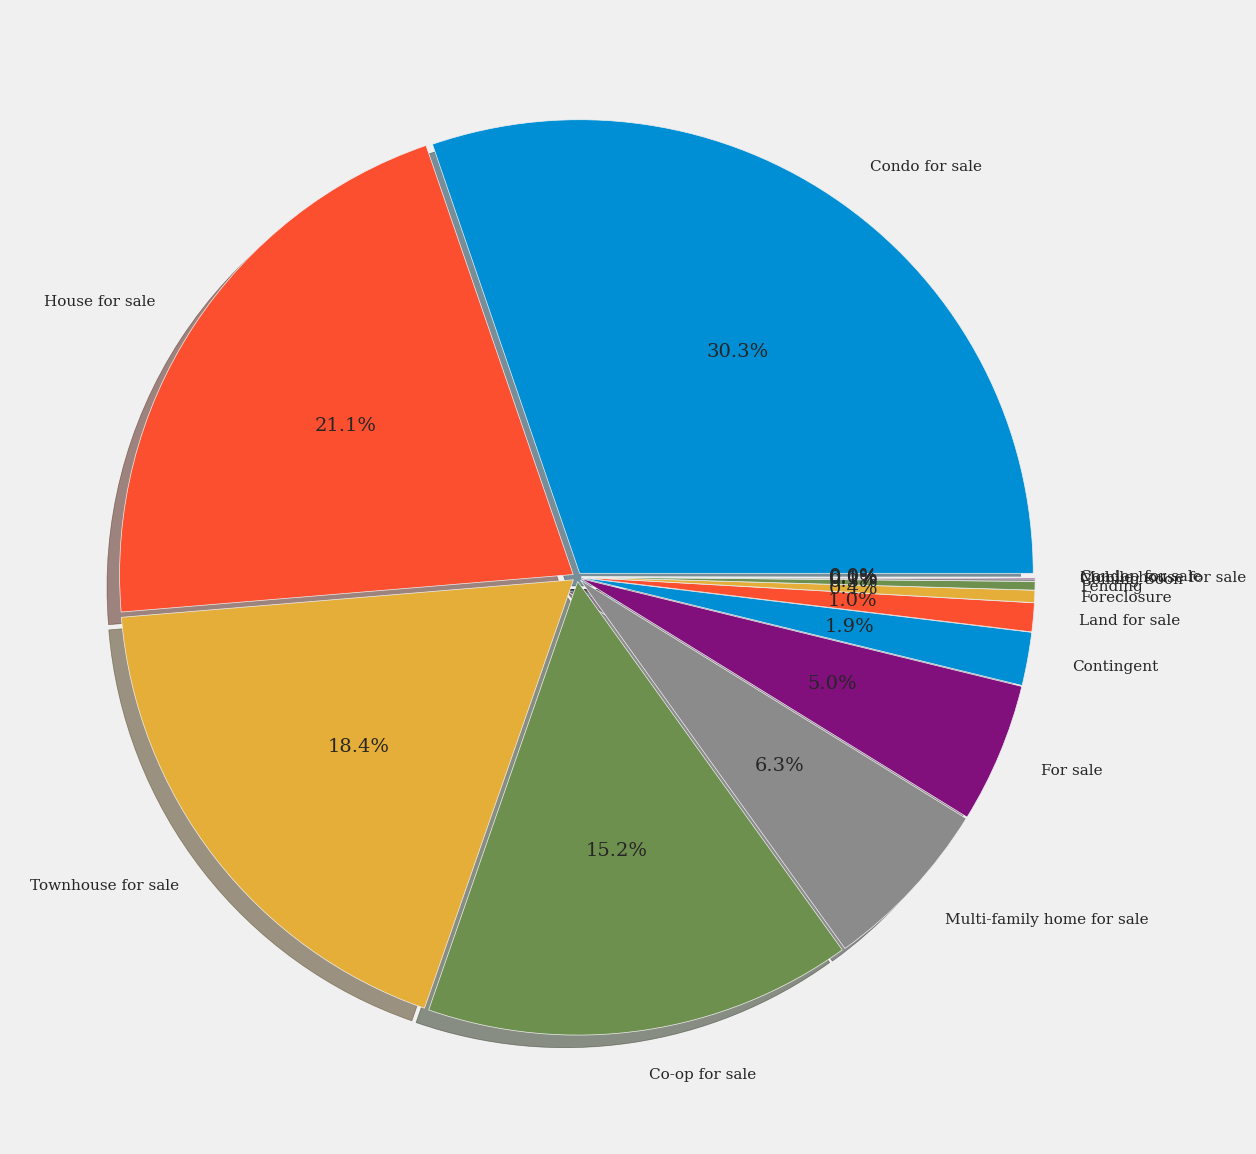

In [12]:
fig, ax = plt.subplots(figsize=(18, 14))
ax.pie(prices['TYPE'].value_counts(normalize=True), labels=prices['TYPE'].unique(),
       explode=([0.01 for _ in range(len(prices['TYPE'].unique()))]),
       autopct='%1.1f%%', shadow=True);

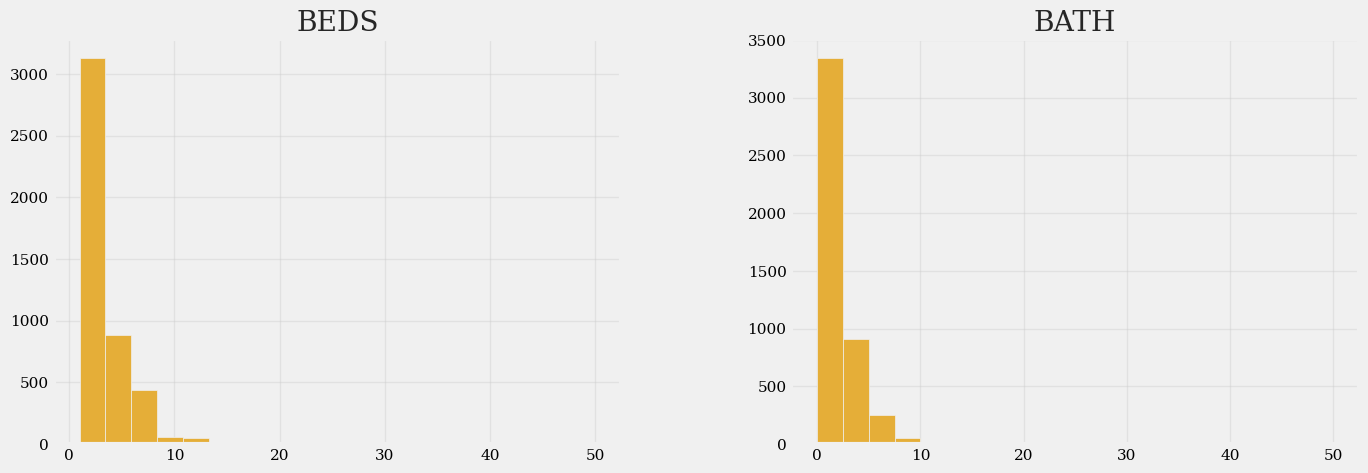

In [13]:
prices.drop(['PRICE', 'LATITUDE', 'LONGITUDE', 'PROPERTYSQFT'], axis=1) \
      .hist(figsize=(15, 5), bins=20, 
            color=color_pal[2]);

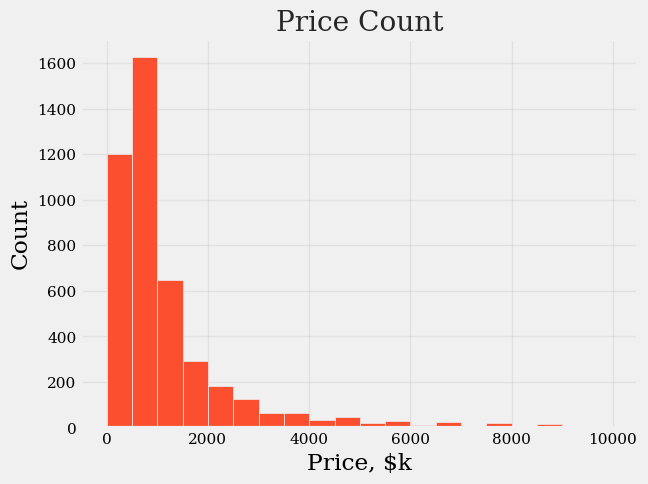

In [14]:
fig, ax = plt.subplots()
ax = (prices.query('PRICE < 10000000')['PRICE'] / 1000).hist(bins=20, color=color_pal[1]);
ax.set_title('Price Count');
ax.set_xlabel('Price, $k');
ax.set_ylabel('Count');

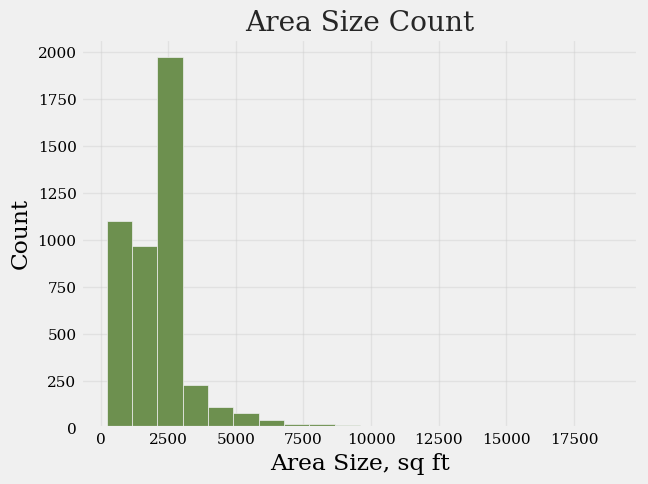

In [15]:
fig, ax = plt.subplots()
ax = (prices.query('PROPERTYSQFT < 20000')['PROPERTYSQFT']).hist(bins=20, color=color_pal[3]);
ax.set_title('Area Size Count');
ax.set_xlabel('Area Size, sq ft');
ax.set_ylabel('Count');

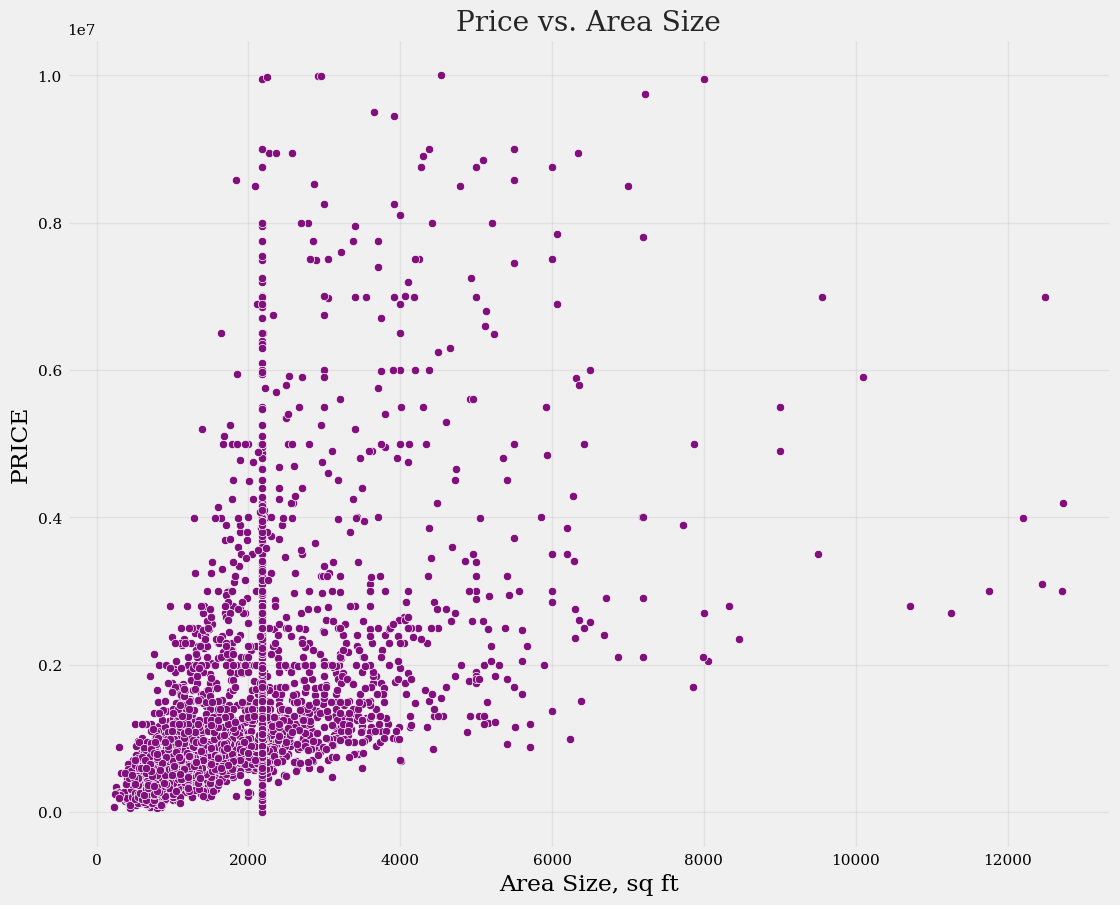

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.scatterplot(data=prices.query('PROPERTYSQFT < 15000') \
                                .query('PRICE < 10000000'),
                    x='PROPERTYSQFT', y='PRICE', color=color_pal[5]);
ax.set_title('Price vs. Area Size');
ax.set_xlabel('Area Size, sq ft');